In [2]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

adata = sc.read_h5ad("../data/mouse/mouse_stroma_processed.h5ad")
print(adata)
adata.obs["leiden"].value_counts()

AnnData object with n_obs × n_vars = 5191 × 2784
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


leiden
0     855
1     841
2     739
3     660
4     566
5     433
6     295
7     181
8     156
9     144
10     94
11     68
12     68
13     65
14     26
Name: count, dtype: int64

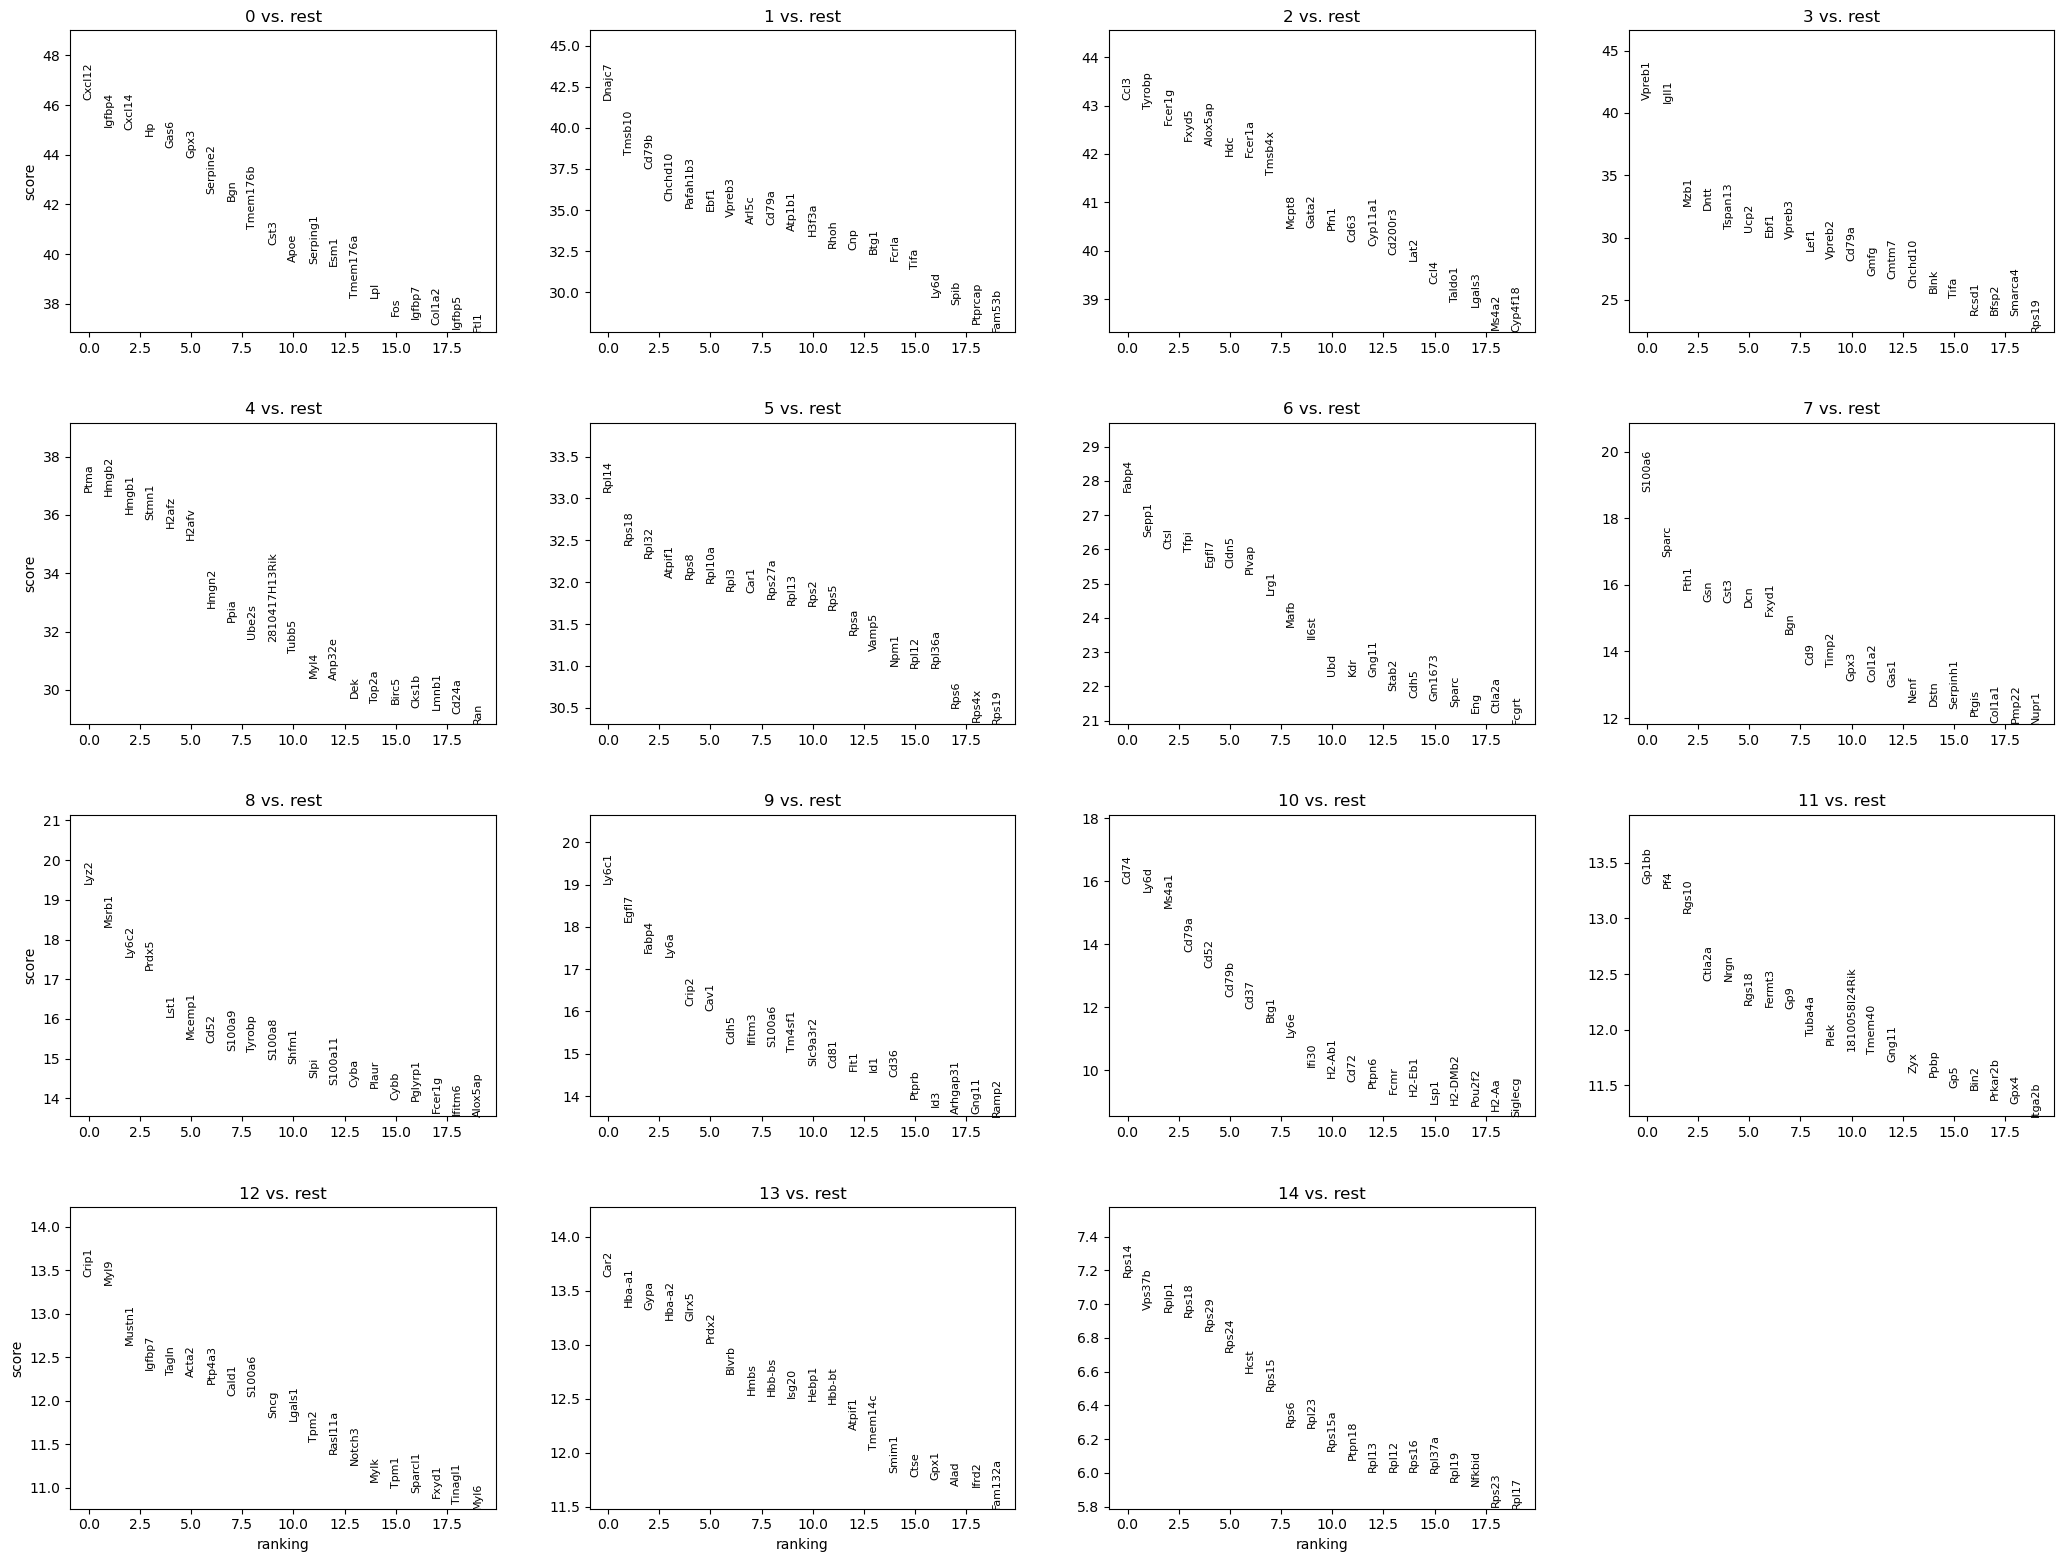

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,Cxcl12,46.203194,8.538551,0.0,0.0
1,0,Igfbp4,45.123585,6.277569,0.0,0.0
2,0,Cxcl14,44.985920,8.355460,0.0,0.0
3,0,Hp,44.762177,7.281410,0.0,0.0
4,0,Gas6,44.274139,7.186937,0.0,0.0


In [3]:
sc.tl.rank_genes_groups(adata, "leiden", method="wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

marker_df = sc.get.rank_genes_groups_df(adata, group=None)
marker_df.to_csv("../results/tables/mouse_leiden_markers.csv", index=False)
marker_df.head()


In [4]:
adata.obs["leiden"].value_counts().sort_index()

leiden
0     855
1     841
2     739
3     660
4     566
5     433
6     295
7     181
8     156
9     144
10     94
11     68
12     68
13     65
14     26
Name: count, dtype: int64

In [5]:
marker_df[marker_df["group"] == "0"].head(20)

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,Cxcl12,46.203194,8.538551,0.000000e+00,0.000000e+00
1,0,Igfbp4,45.123585,6.277569,0.000000e+00,0.000000e+00
2,0,Cxcl14,44.985920,8.355460,0.000000e+00,0.000000e+00
3,0,Hp,44.762177,7.281410,0.000000e+00,0.000000e+00
4,0,Gas6,44.274139,7.186937,0.000000e+00,0.000000e+00
5,0,Gpx3,43.862331,7.265038,0.000000e+00,0.000000e+00
6,0,Serpine2,42.410851,6.120681,0.000000e+00,0.000000e+00
7,0,Bgn,42.133114,5.824979,0.000000e+00,0.000000e+00
8,0,Tmem176b,40.997288,5.300373,0.000000e+00,0.000000e+00
9,0,Cst3,40.354679,3.478292,0.000000e+00,0.000000e+00


In [5]:
marker_df[marker_df["group"] == "1"].head(20)
marker_df[marker_df["group"] == "2"].head(20)
marker_df[marker_df["group"] == "3"].head(20)


,group,names,scores,logfoldchanges,pvals,pvals_adj
8352,3,Vpreb1,41.277554,NaN,0.000000e+00,0.000000e+00
8353,3,Igll1,41.070625,NaN,0.000000e+00,0.000000e+00
8354,3,Mzb1,32.716179,NaN,9.195938e-235,8.533830e-232
8355,3,Dntt,32.432392,NaN,9.594508e-231,6.677778e-228
8356,3,Lef1,29.130743,NaN,1.465180e-186,8.158123e-184
8357,3,Vpreb2,28.434025,NaN,7.680409e-178,3.563710e-175
8358,3,Bfsp2,24.088228,NaN,3.321075e-128,1.320839e-125
8359,3,Crip1,21.297899,NaN,1.187298e-100,4.131796e-98
8360,3,Cplx2,20.593676,NaN,3.127235e-94,9.673580e-92
8361,3,Pmf1,20.419678,NaN,1.117971e-92,3.112431e-90


In [6]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

adata = sc.read_h5ad("../data/mouse/mouse_stroma_processed.h5ad")

adata.var.head()

adata.var_names[:10]

Index(['Sox17', 'Prex2', 'Sulf1', 'Eya1', 'Msc', 'Ly96', 'Jph1', 'Crispld1',
       'Tram2', 'Gm29107'],
      dtype='object')

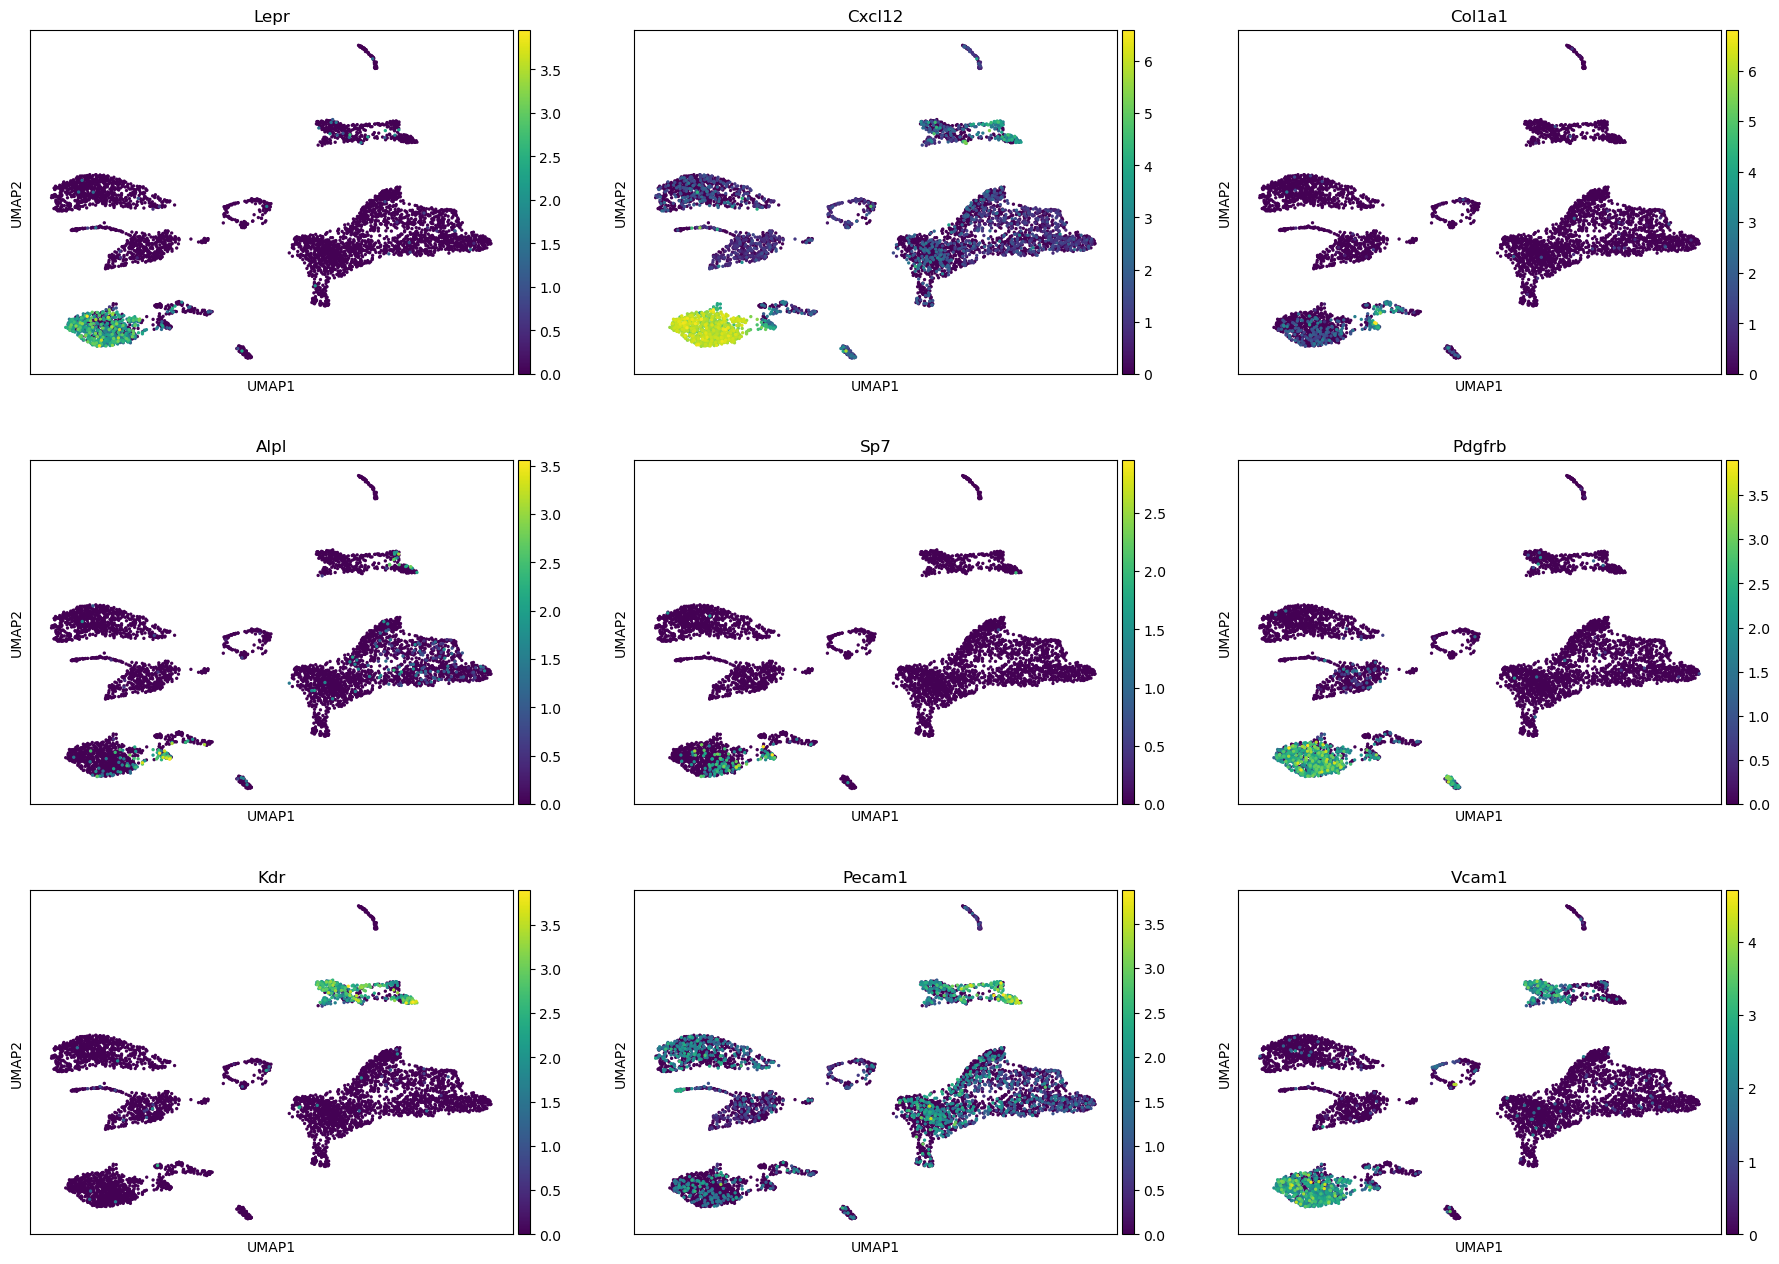

In [7]:
markers_to_check = [
    "Lepr",    
    "Cxcl12",  
    "Col1a1",  
    "Alpl",    
    "Sp7",    
    "Pdgfrb", 
    "Kdr",    
    "Pecam1", 
    "Vcam1"   
]

sc.pl.umap(adata, color=markers_to_check, ncols=3)
